In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suvethav244053","key":"979950a89b18c809bb2d6d4c938046bc"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                 title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20          10808        227  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           8386        171  1.0              
dataanalyst001/world-population-by-country-2024                     World Population by country 2024                     6KB  2024-07-04 09:47:58           1148         26  1.0              
ihelon/coffee-sales                          

In [ ]:
! kaggle datasets download 'pamuduranasinghe/euvp-dataset'

Dataset URL: https://www.kaggle.com/datasets/pamuduranasinghe/euvp-dataset
License(s): CC0-1.0
 99% 1.13G/1.14G [00:12<00:00, 121MB/s]
100% 1.14G/1.14G [00:12<00:00, 100MB/s]


In [ ]:

!unzip euvp-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: EUVP/Unpaired/trainB/gmn_7677up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7678up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7679up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7680up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7681up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7682up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7683up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7684up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7685up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7686up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7687up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7688up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7689up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7690up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7691up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7692up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7693up.jpg  
  inflating: EUVP/Unpaired/trainB/gmn_7694up.jpg  
  inflating: EUVP/Unpaired/trai

In [ ]:
!pip install tensorflow
!pip install tensorflow keras
!pip install tensorflow sklearn
!pip install tensorflow matplotlib
!pip install tensorflow pandas
!pip install tensorflow pil

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


In [ ]:
from collections import defaultdict
# from scipy.stats import itemfreq  # Remove this line
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage import feature
from PIL import Image as IMG
import numpy as np
import pandas as pd
import operator
import cv2
import os
import glob

class_names=['paired','unpaired','eval_data','test_samples']
image_size=224
def get_data_from_folder(path):
  data=[]
  for class_name in class_names:
    try:
      files=glob.glob(path+"/"+class_name+"/*")
      for f in files:
        img=cv2.imread(f)
        img=cv2.resize(img,(image_size,image_size))
        data.append([np.array(img),class_names.index(class_name)])
    except:
      pass
    np.random.shuffle(data)
    return data



In [ ]:
training_data=get_data_from_folder('/content/EUVP')
training_data=get_data_from_folder('/content/test_samples')

In [ ]:
!pip install tensorflow
!pip install tensorflow.keras.preprocessing

ERROR: Could not find a version that satisfies the requirement tensorflow.keras.preprocessing (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.preprocessing


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (224, 224)
batch_size = 32

train_ds = image_dataset_from_directory(
    "/content/EUVP",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "/content/EUVP",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 34690 files belonging to 3 classes.
Using 27752 files for training.
Found 34690 files belonging to 3 classes.
Using 6938 files for validation.


In [ ]:
test_ds = image_dataset_from_directory(
    "/content/test_samples",
    labels = "inferred",
    label_mode = 'int',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1030 files belonging to 2 classes.


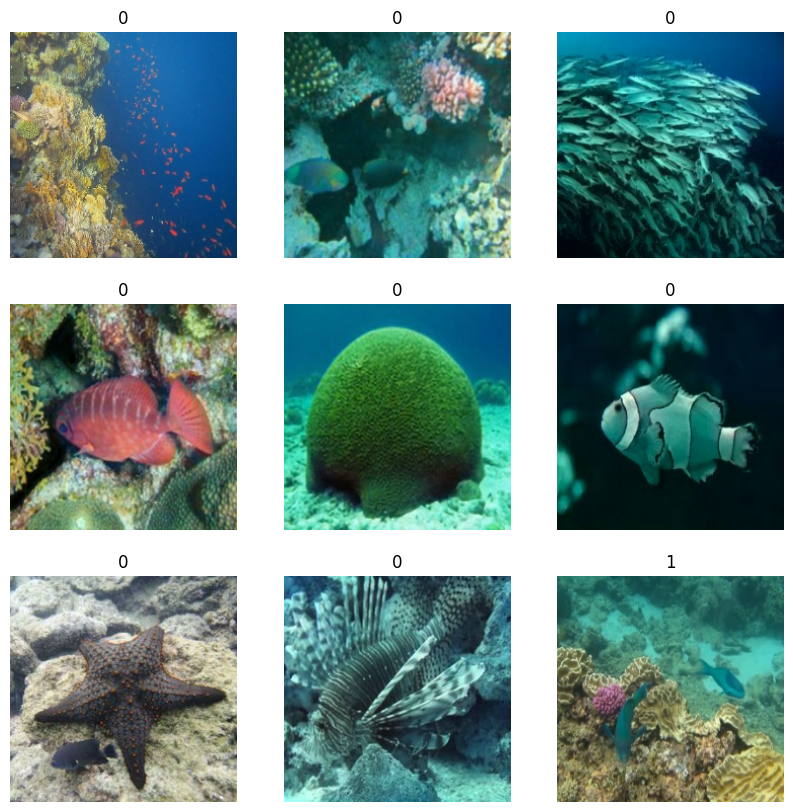

In [ ]:
#visualizing the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

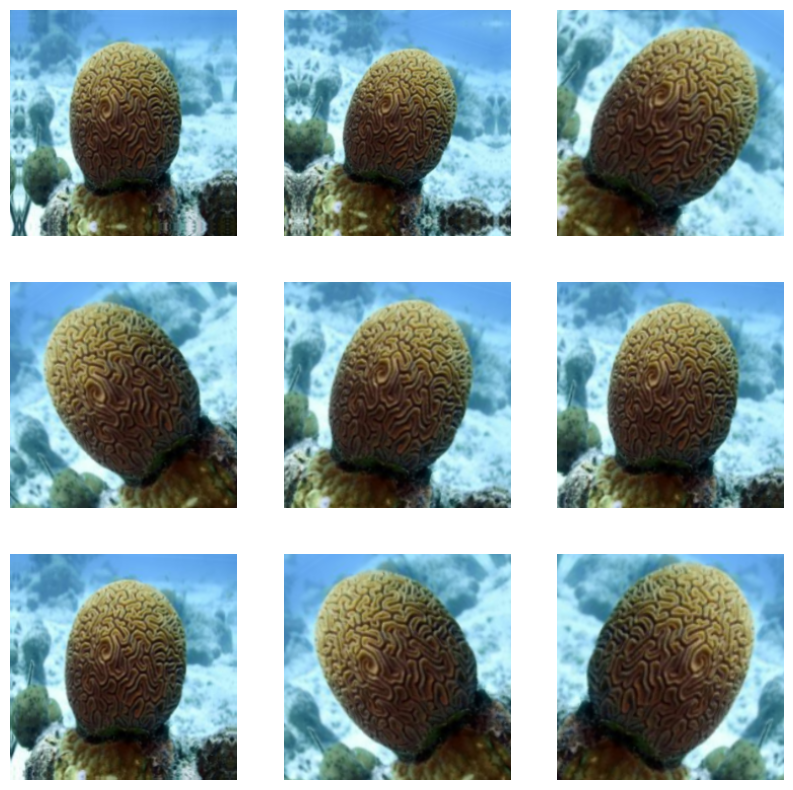

In [ ]:
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory("/content/EUVP",
                                                    batch_size = 32,
                                                    subset="training",
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

test_generator = test_datagen.flow_from_directory("/content/test_samples",
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

val_generator = val_datagen.flow_from_directory("/content/EUVP",
                                                subset = "validation",
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

Found 27752 images belonging to 4 classes.
Found 1030 images belonging to 2 classes.
Found 6938 images belonging to 4 classes.


In [ ]:
!pip install opencv-python scikit-image matplotlib
!pip install opencv-python scikit-image matplotlib scikit-video
!wget -q -O brisque_model_files.zip https://github.com/live-keys/pybrisque/raw/main/brisque_model_files.zip
!unzip -q brisque_model_files.zip -d brisque_model_files

!pip install pybrisque
!wget -q -O brisque_model_files.zip https://github.com/live-keys/pybrisque/raw/main/brisque_model_files.zip
!unzip -q brisque_model_files.zip -d brisque_model_files



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.6 MB/s eta 0:00:00
[brisque_model_files.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of brisque_model_files.zip or
        brisque_model_files.zip.zip, and cannot find brisque_model_files.zip.ZIP, period.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.4/136.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pybrisque: filename=pybrisque-1.0-py3-none-any.whl size=136181 sha256=a441035621a01ecac5ad91528edb889e4bf1c22d7a609f7cd1437227e9baae75
  Stored in directory: /root/.cache/pip/wheels/55/20/e8/a0109336b598dae99

In [ ]:
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install --upgrade numpy pandas scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
!pip list --outdated


Package                          Version               Latest       Type
-------------------------------- --------------------- ------------ -----
absl-py                          1.4.0                 2.1.0        wheel
albumentations                   1.3.1                 1.4.10       wheel
altair                           4.2.2                 5.3.0        wheel
anyio                            3.7.1                 4.4.0        wheel
arviz                            0.15.1                0.18.0       wheel
astropy                          5.3.4                 6.1.1        wheel
bigframes                        1.9.0                 1.10.0       wheel
blinker                          1.4                   1.8.2        wheel
blis                             0.7.11                0.9.1        wheel
blosc2                           2.0.0                 2.7.0        wheel
bokeh                            3.3.4                 3.4.2        wheel
cloudpickle                      2.2.1 

In [ ]:
!pip list --outdated | awk 'NR>2 {print $1}' | xargs -n1 pip install --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.3.1
    Uninstalling albumentations-1.3.1:
      Successfully uninstalled albumentations-1.3.1
  

In [ ]:
!pip install brisque
from brisque import BRISQUE
import numpy as np
from skimage import io, img_as_float

# Instantiate the BRISQUE object
obj = BRISQUE()

# Load the image in RGB format (remove as_gray=True)
img = img_as_float(io.imread('/content/EUVP/Paired/underwater_dark/trainA/265757_00023997.jpg'))

# Call the score method on the object, passing the image
score = obj.score(img)
print("Brisque score = ", score)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm-official: filename=libsvm_official-3.32.0-cp310-cp310-linux_x86_64.whl size=123883 sha256=9956f3b46edba2c604d9461152bb312b406314d0fa948f9513fd9a1e107c1b61
  Stored in directory: /root/.cache/pip/wheels/61/3b/1b/73bb4869517f96a26c82b47ccdb9ec48f12f4466de2371eff6
Successfully built libsvm-official


/usr/local/lib/python3.10/dist-packages/libsvm/svm.py:147: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def csr_to_problem_jit(l, x_val, x_ind, x_rowptr, prob_val, prob_ind, prob_rowptr, indx_start):


Brisque score =  8.242337790536766


In [ ]:
#Copying it to csv file
from brisque import BRISQUE
from skimage import io, img_as_float
import os
import pandas as pd

def calculate_brisque_scores(image_dir):
    # Instantiate the BRISQUE object
    obj = BRISQUE()

    scores = []
    valid_extensions = ('.jpg', '.jpeg', '.png')

    for filename in os.listdir(image_dir):
        if filename.lower().endswith(valid_extensions):
            img_path = os.path.join(image_dir, filename)
            try:
                # Load the image in RGB format (remove as_gray=True)
                img = img_as_float(io.imread(img_path))

                # Call the score method on the object, passing the image
                score = obj.score(img)
                scores.append({'image': filename, 'brisque_score': score})
                print(f"Processed {filename}, BRISQUE score = {score:.2f}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

    return scores

def save_scores_to_csv(scores, output_csv):
    df = pd.DataFrame(scores)
    df.to_csv(output_csv, index=False)
    print(f"Scores saved to {output_csv}")

# Example usage:
image_dir ='/content/EUVP/Unpaired/trainB'  # Replace with your image dataset directory
output_csv = '/content/unpaired_B.csv'  # Replace with the desired output CSV file path

# Calculate BRISQUE scores
scores = calculate_brisque_scores(image_dir)

# Save scores to CSV
save_scores_to_csv(scores, output_csv)


Processed gmn_5099up.jpg, BRISQUE score = -0.78
Processed gmn_5272up.jpg, BRISQUE score = 7.05
Processed gmn_5142up.jpg, BRISQUE score = 8.58
Processed gmn_5451up.jpg, BRISQUE score = 38.06
Processed gmn_5805up.jpg, BRISQUE score = 31.68
Processed gmn_7027up.jpg, BRISQUE score = -11.60
Processed gmn_6848up.jpg, BRISQUE score = 4.27
Processed gmn_8099up.jpg, BRISQUE score = 11.56
Processed gmn_7295up.jpg, BRISQUE score = 3.53
Processed gmn_6486up.jpg, BRISQUE score = 27.16
Processed gmn_6813up.jpg, BRISQUE score = 12.88
Processed gmn_7169up.jpg, BRISQUE score = 17.68
Processed gmn_7690up.jpg, BRISQUE score = 20.39
Processed gmn_7864up.jpg, BRISQUE score = 17.39
Processed gmn_6743up.jpg, BRISQUE score = 18.48
Processed gmn_6073up.jpg, BRISQUE score = 48.41
Processed gmn_7104up.jpg, BRISQUE score = 11.24
Processed gmn_6800up.jpg, BRISQUE score = 8.68
Processed gmn_5771up.jpg, BRISQUE score = 4.94
Processed gmn_8110up.jpg, BRISQUE score = 23.75
Processed gmn_5243up.jpg, BRISQUE score = 60.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade scikit-image
!pip install scikit-image==0.18.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 32.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-image: filename=scikit_image-0.18.3-cp310-cp310-linux_x86_64.whl size=36013693 sha256=387d1657d0fe83dc0f18db87f385a7e808b5f30c7c7d0b9631ab592958f5ef65
  Stored in directory: /root/.cache/pip/wheels/9d/55/80/c5bf730bc10906b1518cd6ebc05c87e69d1c46099ebdc9f59f
Successfully built scikit-image
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [ ]:
import pandas as pd
import cv2
import os
import numpy as np
from skimage import img_as_float
from skimage.restoration import estimate_sigma
from scipy.ndimage import gaussian_filter

def calculate_niqe(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        raise ValueError(f"Error loading image: {image_path}")
    image = img_as_float(image)

    # Convert the image to 8-bit unsigned integer
    image = (image * 255).astype(np.uint8)

    # Convert the image to grayscale
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian filter to the image
    sigma = estimate_sigma(image, multichannel=False, average_sigmas=True)
    image_filtered = gaussian_filter(image, sigma=sigma)

    # Compute the NIQE score (this is a placeholder for actual NIQE computation)
    niqe_value = np.mean(image_filtered)  # Simplified placeholder calculation
    return niqe_value

def normalize_mos_score(mos_score):
    # Scale MOS score to range 1 to 5
    min_score = min(mos_score)
    max_score = max(mos_score)
    normalized_scores = [(5 * (score - min_score) / (max_score - min_score)) for score in mos_score]
    return normalized_scores

def annotate_images_with_quality_scores(csv_file, image_folder, output_folder):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    mos_scores = []

    for index, row in df.iterrows():
        image_name = row['image']
        brisque_score = row['brisque_score']

        # Load the image
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error loading image: {image_path}")
            continue

        # Calculate NIQE score
        niqe_score = calculate_niqe(image_path)

        # Combine BRISQUE and NIQE to get MOS (example: average of both)
        mos_score = (brisque_score + niqe_score) / 2
        mos_scores.append(mos_score)

        # Normalize MOS score to range 1 to 5
        normalized_mos_score = (5 * (mos_score - min(mos_scores)) / (max(mos_scores) - min(mos_scores)))

        # Define the font and text for MOS
        font = cv2.FONT_HERSHEY_SIMPLEX
        text = f"MOS:{normalized_mos_score:.2f}"  # Using normalized MOS score
        font_scale = 1
        font_color = (0, 255, 0)  # Green color
        font_thickness = 2

        # Calculate text size to create background rectangle
        (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)
        text_position = (10, image.shape[0] + text_height + 10)  # Position the text below the image

        # Create a new image with additional space for the text
        new_image_height = image.shape[0] + text_height + 20
        new_image = np.ones((new_image_height, image.shape[1], 3), dtype=np.uint8) * 255  # White background
        new_image[:image.shape[0], :] = image  # Place the original image at the top

        # Put text on the new image
        cv2.putText(new_image, text, text_position, font, font_scale, font_color, font_thickness, cv2.LINE_AA)

        # Save the annotated image to the output folder
        output_path = os.path.join(output_folder, image_name)
        cv2.imwrite(output_path, new_image)
        print(f"Annotated and saved image: {output_path}")

    # Normalize MOS scores to range 1 to 5
    normalized_mos_scores = normalize_mos_score(mos_scores)
    print("Normalized MOS Scores:", normalized_mos_scores)

if __name__ == "__main__":
    csv_file = '/content/unpaired_B.csv'  # CSV file containing image names and BRISQUE scores
    image_folder = '/content/EUVP/Unpaired/trainB'  # Folder containing the original images
    output_folder = '/content/drive/MyDrive/good_img_training'  # Folder to save annotated images

    annotate_images_with_quality_scores(csv_file, image_folder, output_folder)


<ipython-input-44-71b78dc5e40e>:67: RuntimeWarning: invalid value encountered in scalar divide
  normalized_mos_score = (5 * (mos_score - min(mos_scores)) / (max(mos_scores) - min(mos_scores)))


Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_6632up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_7170up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_7739up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_6342up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_7729up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_5348up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_6291up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_5489up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_7155up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_6684up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_6478up.jpg
Annotated and saved image: /content/drive/MyDrive/good_img_training/gmn_5621up.jpg
Anno

In [ ]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,994 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,125 kB]
Get:13 http://security.ubuntu.com/ubuntu

In [ ]:
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,786 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121926 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!pip install pytesseract

In [ ]:
!pip install Pillow opencv-python
!pip install --force-reinstall scikit-image



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.6 MB/s eta 0:00:00
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 33.0 MB/s eta 0:00:00
Using cached packaging-24.1-py3-none-any.whl (53 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting unin

In [ ]:
!pip install --upgrade numpy
!pip install --force-reinstall pandas

  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 83.8 MB/s eta 0:00:00
Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 21.7 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.4
    Uninstalling pytz-2023.4:
      Successfully uninstalled pytz-2023.4
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2024.1
    Uninstalling tzdata-2024.1:
      Successfully uninstalled tzdata-2024.1
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Fo

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.23.5  # Specify the compatible version


Found existing installation: numpy 2.0.0
Uninstalling numpy-2.0.0:
  Successfully uninstalled numpy-2.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


In [ ]:
!pip install --upgrade pip
!pip install opencv-python
!pip install scikit-learn
!pip install pillow
!pip install pytesseract


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install --upgrade pip
!pip install opencv-python scikit-learn pillow pytesseract tensorflow




Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Successfully uninstalled numpy-1.25.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 39.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
import os
from PIL import Image
import pytesseract
import cv2
from sklearn.model_selection import train_test_split
import numpy as np

# Paths
good_quality_folder = '/content/drive/MyDrive/better_quality_image'
bad_quality_folder = '/content/drive/MyDrive/poor_quality_image'
output_folder = '/content/drive/MyDrive/Classroom/II IT Batch 2021-2025'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Parameters
desired_size = (224, 224)  # Example size

# Function to crop image to region containing MOS
def crop_to_mos_region(image_path):
    image = Image.open(image_path)
    width, height = image.size
    # Define the crop box: (left, upper, right, lower)
    crop_box = (0, height * 0.8, width, height)  # Adjust based on actual position
    cropped_image = image.crop(crop_box)
    return cropped_image

# Function to extract MOS from image
def extract_mos(image_path):
    cropped_image = crop_to_mos_region(image_path)
    cropped_image = cropped_image.convert('L')  # Convert to grayscale
    text = pytesseract.image_to_string(cropped_image)
    print(f"OCR output for {image_path}:\n{text}")  # Print OCR output for debugging
    # Extract MOS value from the text
    parts = text.split("MOS:")
    if len(parts) > 1:
        try:
            mos_value = float(parts[1].strip())
            return mos_value
        except ValueError:
            print(f"Unable to convert MOS value to float in {image_path}")
            return None
    else:
        print(f"MOS value not found in {image_path}")
        return None

# Function to resize images
def resize_image(image_path, output_path, size):
    img = Image.open(image_path)
    img = img.resize(size, Image.LANCZOS)  # Use LANCZOS instead of deprecated ANTIALIAS
    img.save(output_path)

# Process images
def process_images(folder):
    images = []
    mos_values = []
    for image_name in os.listdir(folder):
        if image_name.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder, image_name)
            output_path = os.path.join(output_folder, image_name)

            # Extract MOS value
            mos_value = extract_mos(image_path)

            if mos_value is not None:
                # Resize image
                resize_image(image_path, output_path, desired_size)

                # Store image path and MOS value
                images.append(output_path)
                mos_values.append(mos_value)
    return images, mos_values
  # Process both datasets
good_images, good_mos = process_images(good_quality_folder)
bad_images, bad_mos = process_images(bad_quality_folder)

# Combine datasets
all_images = np.array(good_images + bad_images)
all_mos = np.array(good_mos + bad_mos)
# Split dataset
train_images, test_images, train_mos, test_mos = train_test_split(all_images, all_mos, test_size=0.3, random_state=42)
val_images, test_images, val_mos, test_mos = train_test_split(test_images, test_mos, test_size=0.5, random_state=42)

# Save splits to files or use them directly
with open('train_images.txt', 'w') as f:
    for item in train_images:
        f.write("%s\n" % item)

with open('val_images.txt', 'w') as f:
    for item in val_images:
        f.write("%s\n" % item)

with open('test_images.txt', 'w') as f:
    for item in test_images:
        f.write("%s\n" % item)

# MOS values can be saved or used directly as well
np.savetxt('train_mos.txt', train_mos, delimiter=',')
np.savetxt('val_mos.txt', val_mos, delimiter=',')
np.savetxt('test_mos.txt', test_mos, delimiter=',')

Streaming output truncated to the last 5000 lines.

OCR output for /content/drive/MyDrive/poor_quality_image/nm_2540up.jpg:
MOS:89.43

OCR output for /content/drive/MyDrive/poor_quality_image/nm_737up.jpg:
MOS:61.60

OCR output for /content/drive/MyDrive/poor_quality_image/nm_2604up.jpg:
MOS:67.24

OCR output for /content/drive/MyDrive/poor_quality_image/nm_681up.jpg:
MOS:78.32

OCR output for /content/drive/MyDrive/poor_quality_image/nm_3184up.jpg:
MOS:77.01

OCR output for /content/drive/MyDrive/poor_quality_image/nm_274up.jpg:
 

MOS value not found in /content/drive/MyDrive/poor_quality_image/nm_274up.jpg
OCR output for /content/drive/MyDrive/poor_quality_image/nm_1653up.jpg:
MOS:57.26

OCR output for /content/drive/MyDrive/poor_quality_image/nm_1951up.jpg:
MOS:67.98

OCR output for /content/drive/MyDrive/poor_quality_image/nm_2355up.jpg:
MOS:69.78

OCR output for /content/drive/MyDrive/poor_quality_image/nm_2570up.jpg:
MOS:68.57

OCR output for /content/drive/MyDrive/po

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn(input_shape): # Change the input shape here
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output of the convolutional layers
    model.add(Flatten())

    # Fully connected (dense) layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer for regression (single output neuron)
    model.add(Dense(1))

    return model

# Example usage
input_shape = (224, 224, 3)  # Example input shape, adjust as necessary
model = create_cnn(input_shape)

# Print the model summary
model.summary()
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, r2_score

# Load image paths
def load_image_paths(file_path):
    with open(file_path, 'r') as f:
        return [line.strip() for line in f]

# Load MOS values
def load_mos_values(file_path):
    return np.loadtxt(file_path, delimiter=',')

# Load splits from files
train_images = load_image_paths('/content/train_images.txt')
test_images = load_image_paths('/content/test_images.txt')

train_mos = load_mos_values('/content/train_mos.txt')
test_mos = load_mos_values('/content/test_mos.txt')

# Split train data into train and validation sets
train_images, val_images, train_mos, val_mos = train_test_split(train_images, train_mos, test_size=0.2, random_state=42)

# Create TensorFlow dataset
def create_dataset(image_paths, mos_values, batch_size=32, size=(224, 224)):
    def load_and_preprocess_image(path, label):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, size)
        img = img / 255.0  # Normalize to [0, 1] range
        return img, label

    dataset = tf.data.Dataset.from_tensor_slices((image_paths, mos_values))
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

batch_size = 32

train_dataset = create_dataset(train_images, train_mos, batch_size)
val_dataset = create_dataset(val_images, val_mos, batch_size)
test_dataset = create_dataset(test_images, test_mos, batch_size)

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y)),
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate on the test set
test_loss, test_mae = model.evaluate(test_dataset)
print("Test MAE:", test_mae)

# Predict and calculate additional metrics
y_test_pred = model.predict(test_dataset)
test_rmse = np.sqrt(mean_squared_error(test_mos, y_test_pred))
test_r2 = r2_score(test_mos, y_test_pred)
print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)


FileNotFoundError: [Errno 2] No such file or directory: '/content/train_images.txt'